In [1]:
# https://github.com/amitthere/stereo-vision-and-segmentation/blob/master/PA2-Part3.py
# A Maximum Likelihood Stereo Algorithm - Ingemar J. Cox, Sunita L. Hingorani, Satish B. Rao - May 1996 CVIU

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import tqdm

In [3]:
def load_images(fname):
    left = cv2.cvtColor(cv2.imread(fname + '_left.png',), cv2.COLOR_BGR2RGB)
    right = cv2.cvtColor(cv2.imread(fname + '_right.png',), cv2.COLOR_BGR2RGB)
    gt = cv2.imread(fname + '_gt.png',)

    print('Left  - ', left.shape)
    print('Right - ', right.shape)

    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(left)
    ax[0].axis('off')
    ax[0].set_title('Left Image')
    ax[1].imshow(right)
    ax[1].axis('off')
    ax[1].set_title('Right Image')
    plt.tight_layout()
    plt.savefig('{:s}_01_Original.png'.format(fname), dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    left = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)
    return left, right, gt

In [4]:
def optimal_match(left, right, OcclusionCost):
    
    rows, cols = left.shape
    
    dmap_l = np.zeros(left.shape)
    dmap_r = np.zeros(right.shape)

    for x in range(rows):
        print('{:03d}/{:03d}'.format(x, rows), end='\r')
        CostMatrix = np.zeros((cols+1, cols+1))
        DirectionMatrix = np.zeros((cols+1, cols+1))

        for i in range(1, cols+1):
            CostMatrix[i, 0] = i * OcclusionCost
            CostMatrix[0, i] = i * OcclusionCost

        for r in range(1, cols+1):
            for c in range(1, cols+1):
                min1 = CostMatrix[r-1, c-1] + np.abs(int(left[x, r-1]) - int(right[x, c-1]))
                min2 = CostMatrix[r-1, c] + OcclusionCost
                min3 = CostMatrix[r, c-1] + OcclusionCost

                CostMatrix[r, c] = min([min1, min2, min3])
                cmin = CostMatrix[r, c]

                if cmin == min1 :
                    DirectionMatrix[r, c] = 1
                elif cmin == min2 :
                    DirectionMatrix[r, c] = 2
                elif cmin == min3 :
                    DirectionMatrix[r, c] = 3
        
        p = cols
        q = cols

        while (p != 0 and q != 0):
            if DirectionMatrix[p, q] == 1 :
                p = p - 1
                q = q - 1
                dmap_l[x][p] = np.abs(p - q)
                dmap_r[x][q] = np.abs(p - q)
            elif DirectionMatrix[p][q] == 2 :
                p = p - 1
                dmap_l[x][p] = np.abs(p - q)
            elif DirectionMatrix[p][q] == 3 :
                q = q - 1
                dmap_r[x][q] = np.abs(p - q)
                
    return dmap_l, dmap_r

Left  -  (375, 450, 3)
Right -  (375, 450, 3)


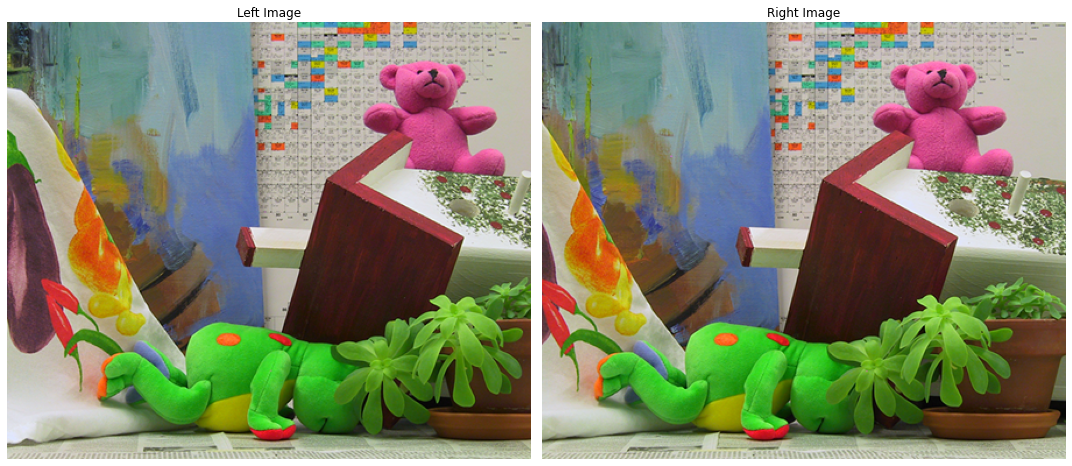

In [5]:
fname = 'teddy'
OcclusionCost = 20

left, right, gt = load_images(fname)
dmap_l, dmap_r = optimal_match(left, right, OcclusionCost)

Displaying Disparity Map



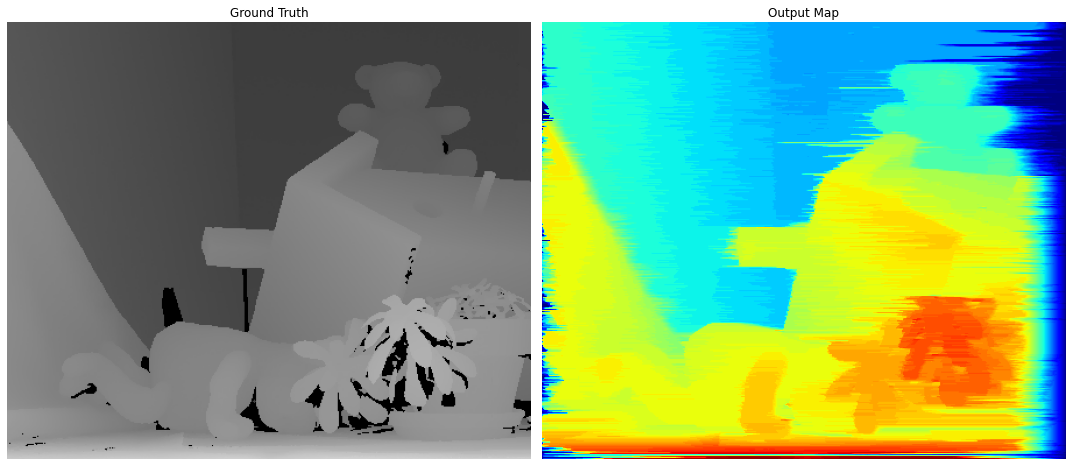

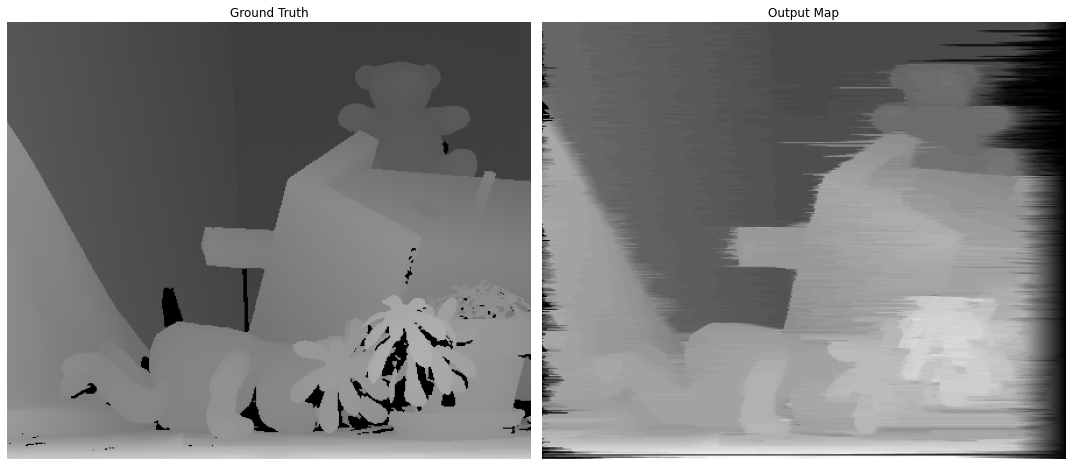

In [6]:
def print_disparitymaps(fname, d_map_l, d_map_r, gt):
    print('Displaying Disparity Map')
    print()

    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(gt, cmap='jet')
    ax[0].axis('off')
    ax[0].set_title('Ground Truth')
    ax[1].imshow(d_map_r/np.max(dmap_r), cmap='jet')
    ax[1].axis('off')
    ax[1].set_title('Output Map')
    plt.tight_layout()
    plt.savefig('{:s}_03_Disparity_Jet.png'.format(fname), dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(gt, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Ground Truth')
    ax[1].imshow(d_map_r/np.max(dmap_r), cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Output Map')
    plt.tight_layout()
    plt.savefig('{:s}_03_Disparity_Gray.png'.format(fname), dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
print_disparitymaps(fname, dmap_l, dmap_r, gt)